Assignment 5
============

Name : Nihar Kanungo
Batch : 6:30 AM , Monday


**Background :**
- - - - - - - -
This is a simple Image Recognition program which makes use of the MNIST preprocessed dataset to process the handwritten digit images and predict the numerical digit each image represents . The Code uses one of the most popular Tensorflow API Keras to perform the operations .It's a supervised Computer Vision problem.

The reason behind choosing MNIST as our first dataset to perform our experiments is not because everyone else are using it but for the following reasons .

1. The Amount of time it takes to train is less , hence we don't have to wait for a longer time to see the outcome of each improvement that we are trying to make  as first few assignments are those in which we perform experiments to sharpen our understanding of the basics 

2. As it's not much complicated dataset , hence we can train the model till we drop the image size till 5 x 5 and still it doesn't harash us by giving a less prediction. This would benefit us by understanding the complete image processing using Convolutional Neural Network 

3. As we plan to add improvements step by step to verify our theoritical understanding with practical experiments , hence a simple dataset will not change drastically due to change in initialization of the random parameters , thereby giving us some significance and visible change over the last change 

4. As to build our fundamentals we need to first work with images where the size of the image is same as size of the object with very less pixels around the border 

-----There are many other benefits of using MNIST but we will pause this topic here and will elaborate when necessary-----


**There are 4 different networks defined in this file . Each network defined in this file is an improvement over it's Predecessor. **

Network -1 : This is the Basic Network which defines the template over which the improvements will be added. The Basic network here refers to the final code of Assignment -4 

Network -2 : This Network works on the Normalized image after the images are standardized  Network-1

Network -3 : This Network adds custom loss functin which is L2 regularization added to the cross entropy loss to penalize the bigger weights 

Network -4 : This Network reverses the order in which batch normalization and activation function was used. In this network we are using batch normalization before the activation function but after the convolution. That means the activation is currently happening external to the convolution function 



**Input**
- - - -
1) 60000 Handwritten digit images (between 0-9)

2) The Images are already segreegated as Train and Test Data with the respective target values


**Environment**
- - - - - - - - 

    Development - Colab GPU , Jupyter Notebook
    Repository : Github

**Algorithm**
- - - - - - 
    Linear Model 
    Convolutional Neural Network (2D) - Gray Scale images
    Maxpooling 
    Softmax Activation function
    loss Function : Categorical Crossentropy
    Optimizer=Adam
    Metrics=accuracy
    Batch Normalization
    Drop Out 
    Image Normalization
    Customized Loss function (Loss function  + L2 Regularization)


**Parameters**
- - - - - - ---------------------

    Batch Size - Variable 
    Epochs - Variable
    Kernel Size - Variable (Advisable to use 3 * 3)
    Number of Kernels - Variable 
    Learning Rate
    regularization coefficient
    

**Conditions**
- - - - - -

1. The Number of parameters < 15,000
2. Should use only Conv2D
3. Should not have applied Maxpooling before 2-4 layers of the conversion into number of classes (10 in this case)
4. Maxpooling should be applied on receptive field of at least 5 x 5 or 7 x 7
5. Activation function should be relu on conv 2D
6. With < 15 EPochs
7. Image Normalization should be used first
8. L2 regularization should not be added to each layer 
9. Batch Normalization should be used before the Activation function

**Expected Result**
- - - - - - - - -

1.To get >= 99.4 % accuracy 

2.To find the first 25 misclassified images

3.Save the Best model w.r.t the Validation accuracy

4.Save the model in the Google drive for future use 

5.To see that the Custom loss function tries to generalize better ( here we have taken a small lambda value , more such experiments may show significant improvements)

6.To see that the Image Normalization improves performance ( Here we may not see a significant improvement as MNIST is a easy dataset, but it definitely helps to converge faster - I will try to run multiple times and post the best network )

7.To see that the sequence of using Batch Normalization and Activation function don't have any impact on the output data which will be fed to the next layer as input 

8.To use Activation function outside of the Convolution layer 



# **Import Libraries and modules**



In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from IPython.display import Image
from keras.optimizers import Adam, SGD, Nadam
from keras.callbacks import LearningRateScheduler
from matplotlib import pyplot as plt
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

import time
import gc
import os
import sys
import dill
import tensorflow as tf
slim = tf.contrib.slim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import tensorflow_probability as tfp
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

W0820 14:44:56.024041 140643382257536 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


# Print Metadata Information 
1. Print the shape of the Training Dataset (Number of Images, Size of the images)
2. Import one of the popular library to plot charts/graphs and command to display it inline
3. Code to show the data

(60000, 28, 28)


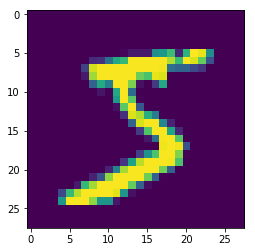

In [4]:

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[0])

#Reshape the Training and test data to gray scale

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Perform Data Standardization 
1. Convert the Images into float32 format
2. Divide the values by 255 to make it with in 0-1 (Standardize)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

***The Core Setup for this assignment ( this is the final code of assignment No 4 - Recap)***
=====================
This core setup is going to be the basic framework . All the future codes will be improvements over this code but the basic setup will be unaltered . This would help us to understand the impact of each feature on our network. The Core setup is described below.

1. Import the Activation layer 
2. Declare the Sequential model
3. Add multiple convolution layers to increase the receptive field ( 3 x 3 kernels)
4. Add Maxpooling to reduce the image size and increase the receptive field 
5. Use small dropout after each convolution to ensure that the model is not over fitting
6. Add Batch normalization after activation of each layer to essure that the model is generalizing well
7.Modify the learning rate after each epoch to converge 
5. Add a large kernel of size 5 x 5 at this stage as going below this may not show significant details of the images
6. Flatten the data to make it 1D 
7. Apply Softmax on each output to find out the predicted class



Display the Summary of the Model. This would give the detail parameters each layer uses . This would be a great information to find out how the memory will be used and where are oppertunities for fine tuning.

 The Total parameters used for this network is < 15000

In [185]:
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()


def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_103 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_103 (Dropout)        (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 24, 24, 14)        1022      
_________________________________________________________________
batch_normalization_104 (Bat (None, 24, 24, 14)        56        
_________________________________________________________________
dropout_104 (Dropout)        (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 22, 22, 24)        3048      
__________

[0.021683135201784172, 0.9935]
[[9.18202320e-12 4.11605328e-08 2.96076035e-08 2.18741363e-07
  6.37922781e-08 2.65363093e-10 1.05903741e-12 9.99999046e-01
  7.02135711e-11 6.27163956e-07]
 [1.02429249e-06 8.89295450e-07 9.99997377e-01 6.62932376e-09
  2.20760811e-07 1.34024606e-12 3.47157510e-07 1.91765004e-09
  6.49364367e-08 3.06864117e-10]
 [8.74688055e-08 9.99996185e-01 1.13632382e-07 2.02231703e-07
  2.13324640e-07 2.87845296e-07 1.20585742e-06 1.48125787e-06
  4.75331099e-08 1.40844083e-08]
 [9.99311328e-01 9.80048889e-11 1.34738873e-10 5.04616651e-08
  6.14594731e-09 3.53703683e-07 6.86454761e-04 3.09342507e-09
  5.02739226e-07 1.45698175e-06]
 [1.31976108e-09 2.90482705e-09 8.89440521e-10 3.39934331e-11
  9.99985576e-01 1.42430095e-10 1.87326998e-09 7.39263717e-09
  1.34966868e-07 1.42858698e-05]
 [5.87095244e-08 9.99988079e-01 1.61987060e-07 5.44403314e-08
  8.42517579e-07 1.67542815e-08 2.98381423e-07 1.04503561e-05
  5.54504709e-08 7.26151868e-08]
 [3.77705171e-14 3.41752127

Observations
---------------------


At the first look the results looks good. But did you also observe that we achieved the magic number as well ? If you haven't then go back and see that we achieved it in the 12th Epoch and improved over it on the 15th one . We can also try to see if more number of epochs takes it further up. But before that let's try and focus on the charts to see how it improved over different epochs and how the loss did .



This shows that 

1. The validation loss was always better than the Training loss and 
2. Simillarly the validation accuracy was always higher than the training accuracy
3. The network also narrowed down the difference between the training and validation accuracies 

That means it did a great job in generalizing the data . We achieved the target with 

1. Less than 15000 Parameters 
2. Less than 15 epochs
3. WIth no greater than 32 batch size







# Connection to Google Drive for saving the Model

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Change the root path (if required)

In [162]:

root_path = 'gdrive/My Drive/Colab Notebooks/'  #change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# This model is using Image normalization

Many times, the photographer with in us asks us to take multiple images of the same object and from many different angles and lighting conditions. What if we take the same image at different time of the day (early morning, afternoon, evening etc.)? Don’t we want out algorithm to identify the object as the same each time? An image taken in bright sun light causes more neurons to fire than the one taken during dusk or after that. 

Hence one of the most popular ways to solve this problem is by bringing all the images into one scale and then let our model train on those images. So, every time a new image comes, we will convert that to the same scale and feed to our network.

![](images/IN.png)


We perform image normalization by subtracting the dataset mean and dividing by standard deviation. This serves to "center" the data. 
We do both the things so that in the process of training our network, we're going to be multiplying (weights) and adding to (biases) these initial inputs in order to cause activations that we then backpropagate with the gradients to train the model. This way our gradients will not go out of control.


**In the following code we achieve image normalization by **



1) Creating an image Data Generator 

2) Fittingthe model using the Data Generator using a batch size of 512 for 40 epochs 

finally we 

Save the Model with highest validation accuracy to google drive for future experiments 

In [9]:
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)
es = EarlyStopping("val_acc",patience=15,restore_best_weights=True)
checkpoint = ModelCheckpoint("model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [es,checkpoint,LearningRateScheduler(scheduler, verbose=1)]





model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
#model.compile(loss=custom_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])


datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=512,shuffle=True),
                    steps_per_epoch=int(np.ceil(len(X_train)/512)), 
                    epochs=40, verbose=1, validation_data=datagen.flow(X_test, Y_test, batch_size=512,shuffle=True), 
                    validation_steps = int(np.ceil(len(X_test)/512)), 
                    callbacks=callbacks_list,)



#model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


model.load_weights("model.hdf5")

# steps=np.ceil(len(X_train)/1024)
# since it is auto calculated by kera so don't fill  it

# iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
# score = model.evaluate_generator(iterator,steps=len(iterator))

# iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
# predictions = model.predict_generator(iterator,steps=len(iterator))

# #_ = predictions(score, predictions,Y_train, classes=get_mnist_labels(),print_results=True, plot_results=False)


# iterator = datagen.flow(X_test, Y_test, batch_size=512, shuffle=False)
# score = model.evaluate_generator(iterator,steps=len(iterator))

iterator = datagen.flow(X_test, Y_test, batch_size=512,shuffle=False)
predictions = model.predict_generator(iterator,steps=len(iterator))
predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices[0])

#_ = predictions(score, predictions,Y_test, classes=get_mnist_labels(),print_results=True, plot_results=False)


# _=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
# _=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)




# score = model.evaluate(X_test, Y_test, verbose=0)
# print(score)


# y_pred = model.predict(X_test)
# print(y_pred[:9])
# print(y_test[:9])



W0820 14:52:28.844107 140643382257536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 14:52:28.861647 140643382257536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 14:52:28.870849 140643382257536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 14:52:28.922181 140643382257536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0820 14:52:28.923209 1406433822

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 14)        1022      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 14)        56        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 24)        3048      
__________

W0820 14:52:33.418844 140643382257536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
118/118 [==============================] - 10s 86ms/step - loss: 0.4125 - acc: 0.8692 - val_loss: 0.1033 - val_acc: 0.9670
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
118/118 [==============================] - 6s 48ms/step - loss: 0.0906 - acc: 0.9725 - val_loss: 0.0617 - val_acc: 0.9801
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
118/118 [==============================] - 6s 48ms/step - loss: 0.0704 - acc: 0.9781 - val_loss: 0.0460 - val_acc: 0.9847
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
118/118 [==============================] - 6s 48ms/step - loss: 0.0582 - acc: 0.9819 - val_loss: 0.0382 - val_acc: 0.9873
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
118/118 [==============================] - 6s 47ms/step - loss: 0.0515 - acc: 0.9840 - v

7


Comparision of Training and Validation outputs 
======================================

![](images/N1loss.png)
![](images/N1acc.png)

The Charts above shows that the model is almost generalizing . Having said that we will try other methods to see of anyone helps doing more generalization than this .

# Define Custom Loss function 


One of the most challenging and much required problem in machine learning is how to make an algorithm that will perform well not just on the training data, but also on new inputs. Many researches and outcomes of those used in machine learning are explicitly designed to reduce the test error, even though at the expense of increased training error. These strategies collectively known as regularization. 




Two most popular Regularization methods are L1 & L2 regularization. They are also known as Lasso and Ridge regressions respectively.

We can define L1 regularization as 

![](images/L1_reg.png)


where w is the model parameter. That means it’s the sum of absolute values of individual parameters 

In the similar line L2 regularization can be defined as 

![](images/L2_reg.png)

In this case we use the square of the parameters. It’s also known as weight decay.
 
 

Below we have defined a method which takes two values  i) the actual values and ii) the predicted value

Definee the L2 Regression function

Define the value of lambda ( configurable)

Calculated the sum of the square of all the weights of all the layers 

add the L2 Regression value to the Cross entropy loss

Returns the value of new loss function which will be used during model fitting and validation


In [0]:
# Define custom loss

def custom_loss(actual,predicted):
    print(actual)
    print(predicted)
    
    sqr_w = 0
    lamda = 0.001 

    for layer in model.layers:
       sqr_w = sqr_w + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))

    l2_regularization = (lamda*sqr_w)/2*(32) 
    loss = K.categorical_crossentropy(actual,predicted) + l2_regularization

    # Return a function
    return loss


# Adding the L2 Regularization with the Loss function

So, to want to give a mathematical expression to regularization then it would be something like the below.

**J˜(θ;X, y) = J(θ;X, y) + αΩ(θ)**

Where J˜: Regularized objective function 
Ω(θ) – Parameter norm penalty  


"α ∈  0, ∞"  is a hyperparameter that weights the relative contribution of the norm penalty term, Ω, relative to the standard objective function J.
The larger the value of α- The more regularization effect it has. Having said that the data scientists are to be watchful on the extend of αto be used depending on the situation



The below model is trained using the custom loss function which is nothing but the combination of cross entropy loss and L2 regularization 
The model that gave the highest accuracy is saved in the google drive

In [11]:
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)
es = EarlyStopping("val_acc",patience=15,restore_best_weights=True)
checkpoint = ModelCheckpoint("model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [es,checkpoint,LearningRateScheduler(scheduler, verbose=1)]





#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.compile(loss=custom_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])


datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=512,shuffle=True),
                    steps_per_epoch=int(np.ceil(len(X_train)/512)), 
                    epochs=40, verbose=1, validation_data=datagen.flow(X_test, Y_test, batch_size=512,shuffle=True), 
                    validation_steps = int(np.ceil(len(X_test)/512)), 
                    callbacks=callbacks_list,)



#model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


model.load_weights("model.hdf5")

# steps=np.ceil(len(X_train)/1024)
# since it is auto calculated by kera so don't fill  it

# iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
# score = model.evaluate_generator(iterator,steps=len(iterator))

# iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
# predictions = model.predict_generator(iterator,steps=len(iterator))

# #_ = predictions(score, predictions,Y_train, classes=get_mnist_labels(),print_results=True, plot_results=False)


# iterator = datagen.flow(X_test, Y_test, batch_size=512, shuffle=False)
# score = model.evaluate_generator(iterator,steps=len(iterator))

iterator = datagen.flow(X_test, Y_test, batch_size=512,shuffle=False)
predictions = model.predict_generator(iterator,steps=len(iterator))
predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices[0])

#_ = predictions(score, predictions,Y_test, classes=get_mnist_labels(),print_results=True, plot_results=False)


# _=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
# _=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)




# score = model.evaluate(X_test, Y_test, verbose=0)
# print(score)


# y_pred = model.predict(X_test)
# print(y_pred[:9])
# print(y_test[:9])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 14)        1022      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 14)        56        
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 24)        3048      
__________

7


Comparision of Training and Validation outputs
=======================================

![](images/N1loss.png)

![](images/N2acc.png)


The Charts above shows that the model is improving even though a little. The reason why we are not seeing much difference as MNIST is a easy dataset and we are almost at 99.4 - 99.5 . Even a small improvement on top of this helps in understanding the power of the improvements choosen.

# By Adding Batch Normalization Before Relu

Since the inception of Batch normalization (Y 2015) it's been one of the popular normalization technique which works by eliminating the effect of internal covariation shift. One of the open question is if it should be used before the activation layer or after. There has been many discussions, papers, researches happened in this area , however the benefit of using one first over another is not clearly visible . In the below code we will implement BN before the activation layer and try to see if there are any performance changes over it . Here is a small example of how the graph may look like if we try to 

i) use BN before relu

ii) Relu before BN

![](images/BN_relu_tradeoff.png)

We don't see any significance difference from the chart theoritically. let's see how the netowrk behaves in this case 


The model performs the following tasks 

1. Takes the activation layer outside of the convolution function
2. Place Batch normalization function before the activation 
3. Trains the model for 40 epochs
4. Saves the model with highest validation accuracy
5. Saves the Model to google drive for future use

In [12]:
model = Sequential()

#model.add(BatchNormalization()) 
model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1)))


model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(14, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
                        


model.add(Convolution2D(24, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

#model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))                        
model.add(Dropout(0.1))
                        

#model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))                          
model.add(Dropout(0.1))
                        

#model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))                        
model.add(Dropout(0.1))


#model.add(BatchNormalization())
model.add(Convolution2D(10, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))                        
model.add(Dropout(0.1))


model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)
es = EarlyStopping("val_acc",patience=15,restore_best_weights=True)
checkpoint = ModelCheckpoint("model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [es,checkpoint,LearningRateScheduler(scheduler, verbose=1)]





#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.compile(loss=custom_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])


datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=512,shuffle=True),
                    steps_per_epoch=int(np.ceil(len(X_train)/512)), 
                    epochs=40, verbose=1, validation_data=datagen.flow(X_test, Y_test, batch_size=512,shuffle=True), 
                    validation_steps = int(np.ceil(len(X_test)/512)), 
                    callbacks=callbacks_list,)



#model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


model.load_weights("model.hdf5")

# steps=np.ceil(len(X_train)/1024)
# since it is auto calculated by kera so don't fill  it

# iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
# score = model.evaluate_generator(iterator,steps=len(iterator))

# iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
# predictions = model.predict_generator(iterator,steps=len(iterator))

# #_ = predictions(score, predictions,Y_train, classes=get_mnist_labels(),print_results=True, plot_results=False)


# iterator = datagen.flow(X_test, Y_test, batch_size=512, shuffle=False)
# score = model.evaluate_generator(iterator,steps=len(iterator))

iterator = datagen.flow(X_test, Y_test, batch_size=512,shuffle=False)
predictions = model.predict_generator(iterator,steps=len(iterator))
predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices[0])

#_ = predictions(score, predictions,Y_test, classes=get_mnist_labels(),print_results=True, plot_results=False)


# _=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
# _=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)




# score = model.evaluate(X_test, Y_test, verbose=0)
# print(score)


# y_pred = model.predict(X_test)
# print(y_pred[:9])
# print(y_test[:9])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 14)        1022      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 14)        56        
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 14)        0         
__________

7


Comparision of Training and Validation outputs
=========================================

![](images/N3loss.png)
![](images/N3acc.png)


The Charts above shows that the model is generalizing well. The results are not much different than the previous model which helps us to understand that BN before relu doesn't have a large impact on the performance of the network. Below i have pasted the charts to compare the accuracy between the networks. This should give us a good visualization to understand the impact of each feature on the network

# Save the Model to Google Drive for Future Use

In [0]:
model.save('gdrive/My Drive/Colab Notebooks/model_final_assignment5.hdf5')

# Display the Misclassified Images (25)

Display the first 25 misclassified images

The image should include the Predicted Class and Actual Class

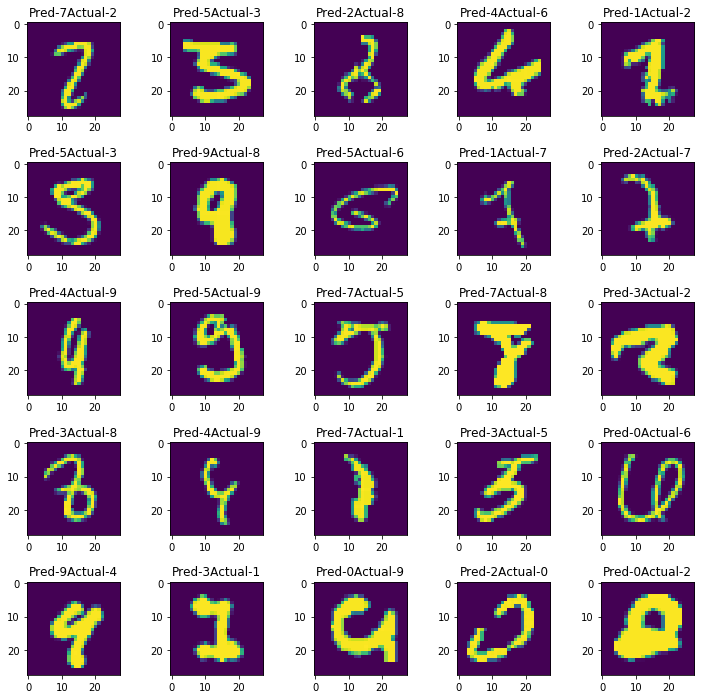

In [14]:
%matplotlib inline
#y_pred = model.predict_classes(X_test)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
image_cnt = 0
#display_cnt=1
w=10
h=10
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 5

for i in range(len(predicted_class_indices)):
 # print('value of i before is',i)
  if predicted_class_indices[i] != y_test[i]:
    ax = fig.add_subplot(rows, columns, image_cnt+1)
    title = 'Pred-' + str(predicted_class_indices[i]) +'Actual-' + str(y_test[i] )
   # ax.title.set_text('                      ' )
    ax.title.set_text(title )
    
    plt.imshow(X_test[i])
    image_cnt +=1
    #display_cnt +=1
   # print('value of image count is', image_cnt)  
  if image_cnt >= 25:
    break
    i = len(y_pred)
   # print(' length of ypred is',len(y_pred),'and value of i now is',i)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()    

    
    


# Find out the Total number of misclassified images

In [15]:
#y_pred = model.predict_classes(X_test)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
count1 =0
for i in range(len(predicted_class_indices)):
 # print('value of i before is',i)
  if predicted_class_indices[i] != y_test[i]:
    count1 +=1
print('count is', count1)




count is 53


Comparision Between the Accuracies of each of the Model
=================================================
![](images/acc_compare.png)

If we look at the charts above it's significant that there are improvements of using Image normalization over the model without.We can also see some small improvement over using a custom loss function. The Accuracies are not drastically high as MNIST is a simple data set and the model generalized to a good extent after normalizing the image. Having said that this small improvement can have a much larger impact when we apply this technique over complicated data. At the same time much more iterations with variable values of regularization parameter may improve the accuracy  and reduce the gap between the training and validation parameters 

Comparision Between the Loss for the same loss function while using BN before relu and After relu
===============================================================================
![](images/loss_compare.png)


Now when we see the above charts it's clearly evident that the loss is more while we use BN before relu . But is this a issue that we should address. Certainly not as the loss is due to the weights . When we compare between the loss in Training and validation for the same neetwork it's in the similar range . Let's try to understand why the loss is more in the network where BN is used before Relu.

The reason behind that is the output value of the layer. When we use relu after BN it eliminates the negative values and now in the nest layer the kernel which needs to work on it assigns larger weights in comparision to the 2nd network where the BN was applied after activation function in which the output was also negative and smaller weights were good for it .

Even though the values are less or more but let's understand that it's all about the scaling factor.

I will try to run these experiments more numer of times and update this with my findings .

Please reachout to me for any comments /suggestions (nihar.kanungo@gmail.com)